In [101]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import shap
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

ImportError: Numba needs NumPy 1.21 or less

In [39]:
data = pd.read_csv('features.csv',  engine = 'python',  on_bad_lines = 'skip', index_col=[0])

In [40]:
warnings.filterwarnings('ignore')

In [41]:
data[data.isnull().any(axis=1)]

,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),...,Neighbor_NORTHEAST,Neighbor_NORTHWEST,Neighbor_North,Neighbor_Northwest,Neighbor_SOUTHEAST,Neighbor_SOUTHWEST,Built_1900-1945,Built_1946-1970,Built_1971-1990,Built_1991-2015


In [42]:
data = data.dropna(axis=0, how='any')

In [43]:
print(data.isnull().sum())

NumberofFloors                      0
ENERGYSTARScore                     0
SiteEUI(kBtu/sf)                    0
SiteEUIWN(kBtu/sf)                  0
SourceEUIWN(kBtu/sf)                0
SiteEnergyUse(kBtu)                 0
SiteEnergyUseWN(kBtu)               0
SteamUse(kBtu)                      0
Electricity(kBtu)                   0
NaturalGas(kBtu)                    0
GHGEmissionsIntensity               0
GHGEmissionsIntensity_log           0
SiteEUI(kBtu/sf)_log                0
Type_Distribution Center            0
Type_Hospital                       0
Type_Hotel                          0
Type_K-12 School                    0
Type_Laboratory                     0
Type_Large Office                   0
Type_Low-Rise Multifamily           0
Type_Medical Office                 0
Type_Mixed Use Property             0
Type_Other                          0
Type_Refrigerated Warehouse         0
Type_Residence Hall                 0
Type_Restaurant                     0
Type_Retail 

In [44]:
data.shape

(1534, 57)

In [45]:
data.head()

,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),...,Neighbor_NORTHEAST,Neighbor_NORTHWEST,Neighbor_North,Neighbor_Northwest,Neighbor_SOUTHEAST,Neighbor_SOUTHWEST,Built_1900-1945,Built_1946-1970,Built_1971-1990,Built_1991-2015
0,12,60.0,81.699997,84.300003,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,...,0,0,0,0,0,0,1,0,0,0
1,11,61.0,94.800003,97.900002,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,...,0,0,0,0,0,0,0,0,0,1
2,41,43.0,96.000000,97.699997,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,...,0,0,0,0,0,0,0,1,0,0
3,10,56.0,110.800003,113.300003,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,...,0,0,0,0,0,0,1,0,0,0
4,18,75.0,114.800003,118.699997,215.600006,14172606.0,14656503.0,0.00,5368607.0,8803998.0,...,0,0,0,0,0,0,0,0,1,0


# 3 Prédiction emission

## 3.1  Séléction des features 

### 3.1.1  Multivariate traitement pour éliminer les variables fortement corrélées

In [54]:
# potentielles variables numériques pour X
X_cols_num = ['NumberofFloors', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

<Axes: >

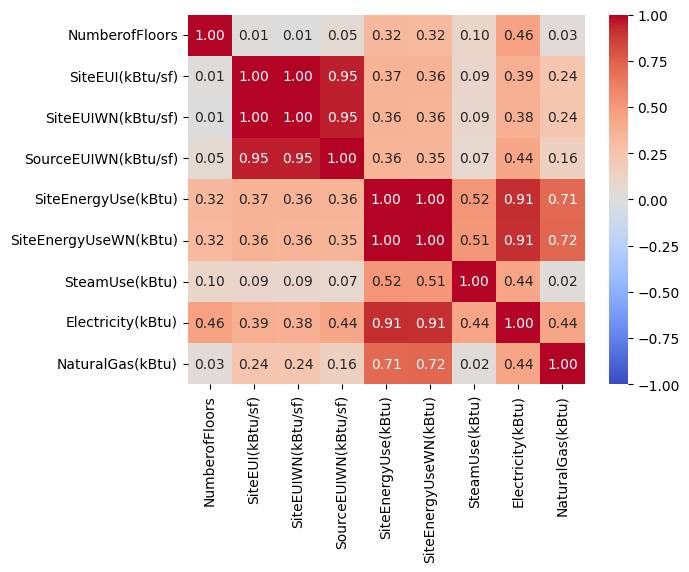

In [55]:
X_num = data[X_cols_num]
sns.heatmap(X_num.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [56]:
X_correlated = ['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [57]:
X_num = X_num.drop(X_correlated, axis = 1)

<Axes: >

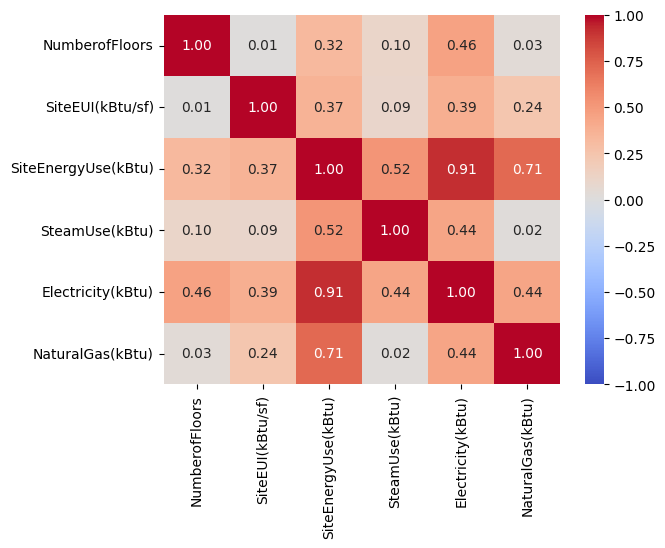

In [58]:
sns.heatmap(X_num.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### 3.1.2  Sélection top 5 features 

In [61]:
y = data['GHGEmissionsIntensity']

In [64]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # use this for classification tasks
from sklearn.feature_selection import f_regression # use this for regression tasks

# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=test_size, random_state=seed)
print(X_train.shape)
print(X_test.shape)

kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(X_train, y_train)

print("Feature selection", kbest.get_support())
print("Feature scores", kbest.scores_)
print("Selected features:", list(X_num.columns[kbest.get_support()]))
print("Removed features:", list(X_num.columns[~kbest.get_support()]))

(1027, 6)
(507, 6)
Feature selection [False  True  True  True  True  True]
Feature scores [   3.63574527 1070.93922071  302.60561124   54.05806445  116.34088147
  397.83741515]
Selected features: ['SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
Removed features: ['NumberofFloors']


In [65]:
X_num.head()

,NumberofFloors,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,81.699997,7226362.5,2003882.00,3946027.0,1276453.0
1,11,94.800003,8387933.0,0.00,3242851.0,5145082.0
2,41,96.000000,72587024.0,21566554.00,49526664.0,1493800.0
3,10,110.800003,6794584.0,2214446.25,2768924.0,1811213.0
4,18,114.800003,14172606.0,0.00,5368607.0,8803998.0


In [66]:
X_num = X_num.drop(['NumberofFloors'], axis = 1)

## 3.2. préparation des données

In [68]:
X_cols_num = X_num.columns
len(X_cols_num)

5

In [70]:
X_cols_remove = ['GHGEmissionsIntensity', 'GHGEmissionsIntensity_log', 'SiteEUI(kBtu/sf)_log', 'NumberofFloors', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [71]:
X = data.drop(X_cols_remove, axis = 1).values
y = data['GHGEmissionsIntensity'].values

In [72]:
# séparation de train et test 
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# normalisation seulement des variables numériques
from sklearn import preprocessing

scaler = StandardScaler()

X_train_num = X_train[:, :len(X_cols_num)]
X_train_cat = X_train[:, len(X_cols_num):]
X_train_num_std = scaler.fit_transform(X_train_num)
X_train_std = np.concatenate((X_train_num_std, X_train_cat), axis=1)

X_test_num = X_test[:, :len(X_cols_num)]
X_test_cat = X_test[:, len(X_cols_num):]
X_test_num_std = scaler.fit_transform(X_test_num)
X_test_std = np.concatenate((X_test_num_std, X_test_cat), axis=1)

In [74]:
def performance(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("MSE : {:.2f}".format(mse))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: {:.2f}".format(rmse))
    r2 = r2_score(y_test, y_pred)
    print("R2 : {:.2f}".format(r2))
    return mse, rmse, r2

## 3.3 Choix de modèle et noyau

### 3.3.1 Baseline avec regression linéaire 

In [93]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy='mean')

# Entraîner le dummy regressor sur les données d'entraînement
dummy_regressor.fit(X_train_std, y_train)

# Prédire les valeurs cibles pour les données de test
y_pred = dummy_regressor.predict(X_test_std)

mse, rmse, r2 = performance(y_test, y_pred)

MSE : 5.91
RMSE: 2.43
R2 : -0.01


In [94]:
model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 20.46
RMSE: 4.52
R2 : -2.49


### 3.3.2   Modèle  avec  KernelRidgeRegression à  noyau 

In [90]:
# Noyau linéaire 
model = KernelRidge(alpha=1, kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse, rmse, r2 = performance(y_test, y_pred)


MSE : 3.06
RMSE: 1.75
R2 : 0.48


In [77]:
# avec Noyau non linéaire gaussien rbf 
model = KernelRidge(alpha=1, kernel='rbf', gamma=0.01)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 7.79
RMSE: 2.79
R2 : -0.33


Recheche des hyper paramètres par grilles de alpha, gamma et noyau

In [78]:
# Create a KRR model  ( Running time = 10s)
kr = KernelRidge()

# Définir la grille de paramètres à tester
param_grid = {
    'alpha': np.logspace(-4, 2, 5),
    'gamma': np.logspace(-4, 2, 5),
    'kernel': ['linear', 'polynomial', 'rbf']
}

# Effectuer la recherche d'hyperparamètres par validation croisée et recherche en grille
grid_search = GridSearchCV(estimator=kr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_std, y_train)

# Afficher les meilleurs paramètres trouvés et leur performance
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure performance : ", np.sqrt(-grid_search.best_score_))

# Utiliser les meilleurs paramètres pour ajuster le modèle final
kr_final = grid_search.best_estimator_

# prédire sur le jeu de test avec le modèle sélectionné 
y_pred = kr_final.predict(X_test_std)

# calculer les performance 
mse, rmse, r2 = performance(y_test, y_pred)

Meilleurs paramètres :  {'alpha': 3.1622776601683795, 'gamma': 0.0001, 'kernel': 'linear'}
Meilleure performance :  1.3440409381379181
MSE : 2.74
RMSE: 1.66
R2 : 0.53


In [91]:
from sklearn.linear_model import Lasso
from sklearn.kernel_approximation import PolynomialCountSketch

# Transformer les données avec un noyau polynomial de degré 2
poly = PolynomialCountSketch(degree=2)
X_train_transformed = poly.fit_transform(X_train_std)
X_test_transformed = poly.transform(X_test_std)
# Initialiser le modèle Lasso avec une régularisation L1
lasso = Lasso(alpha=0.1)

# Entraîner le modèle sur les données transformées
lasso.fit(X_train_transformed, y_train)

# Évaluer les performances du modèle sur les données de test transformées
y_pred = lasso.predict(X_test_transformed)

# calculer les performance 
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 79.78
RMSE: 8.93
R2 : -12.62


In [92]:
from sklearn.svm import SVR

# Définition du modèle SVM
svm_model = SVR(kernel='rbf', C=1)

# Entraînement du modèle SVM
svm_model.fit(X_train_std, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test_std)

# Calcul de la performance du modèle
# calculer les performance 
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 4.39
RMSE: 2.10
R2 : 0.25


### 3.3.3  Modèle ensembliste parallèle : Random forest Regression
Ramdon forest est adapté pour prédiction par regression 

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Créer un modèle de forêt aléatoire
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Former le modèle sur les données non normalisées, car ensembliste n'est pas sensible 
rf_regressor.fit(X_train, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_pred = rf_regressor.predict(X_test)

# calculer les performance 
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 2.86
RMSE: 1.69
R2 : 0.51


Recheche de hyper paramètres pour RF 

In [20]:
# (Running time = 36min  , with CPU 90%)
from sklearn.model_selection import GridSearchCV

# Définir le modèle de Random Forest Regression
rf = RandomForestRegressor()

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'mae']
}

# Effectuer la recherche d'hyperparamètres par validation croisée et recherche en grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés et leur performance
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure performance : ", np.sqrt(-grid_search.best_score_))

# Utiliser les meilleurs paramètres pour ajuster le modèle final
rf_final = grid_search.best_estimator_
#rf_final = RandomForestRegressor(**grid_search.best_params_)
#rf_final.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = rf_final.predict(X_test)

mse, rmse, r2 = performance(y_test, y_pred)

Meilleurs paramètres :  {'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleure performance :  0.31173363416150407
MSE : 0.11
RMSE: 0.33
R2 : 0.92


### 3.3.4. Ensembliste parallèle: Bagging Regression avec Arbre de décision

In [81]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Division des données en ensembles d'apprentissage et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construction du modèle de bagging avec 10 arbres de décision
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                            n_estimators=10, random_state=42)

# Apprentissage du modèle sur les données d'apprentissage
bagging.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = bagging.predict(X_test)

# Evaluation de la précision des prévisions
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 3.17
RMSE: 1.78
R2 : 0.46


Hyper paramètres pour Bagging

In [82]:
# Définir le modèle de base  (running time = 10s)
base_model = DecisionTreeRegressor()

# Définir le modèle Bagging avec GridSearchCV
bagging_model = GridSearchCV(BaggingRegressor(base_estimator=base_model),
                             param_grid={'n_estimators': [10, 100, 500]},
                             cv=5)

# Adapter le modèle sur les données d'entraînement
bagging_model.fit(X_train, y_train)

# Obtenir les meilleurs hyper-paramètres et le score R2 correspondant
print("Meilleurs hyper-paramètres : ", bagging_model.best_params_)
print("Score R2 : ", bagging_model.best_score_)

# Utiliser les meilleurs paramètres pour ajuster le modèle final
bagging_final = bagging_model.best_estimator_
#bagging_final = RandomForestRegressor(**bagging_model.best_params_)
#bagging_final.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = bagging_final.predict(X_test)

mse, rmse, r2 = performance(y_test, y_pred)

Meilleurs hyper-paramètres :  {'n_estimators': 500}
Score R2 :  0.8210719167721401
MSE : 2.79
RMSE: 1.67
R2 : 0.52


### 3.3.5 Ensembliste séquentielle : GBoostRegression

GBoost Model 

MSE : 2.96
RMSE: 1.72
R2 : 0.50
Feature: 0, Score: 0.00491
Feature: 1, Score: 0.65849
Feature: 2, Score: 0.03071
Feature: 3, Score: 0.06283
Feature: 4, Score: 0.06688
Feature: 5, Score: 0.15490
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00013
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00044
Feature: 11, Score: 0.00092
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00126
Feature: 15, Score: 0.00110
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00051
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00034
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00236
Feature: 34, Score: 0.0000

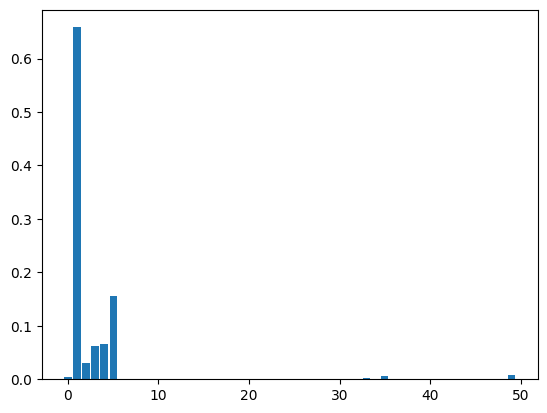

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

# Division des données en ensembles d'apprentissage et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le modèle Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle sur l'ensemble de données d'entraînement
gb_reg.fit(X_train, y_train)

# Prédire les valeurs de sortie sur l'ensemble de données de test
y_pred = gb_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) du modèle
mse, rmse, r2 = performance(y_test, y_pred)

# get importance
importance = gb_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### SHAP 

# Calculer les valeurs SHAP pour une instance de données de test spécifique
explainer = shap.Explainer(model)
shap_values = explainer(X_test.iloc[0, :])

# Créer une visualisation pour interpréter les valeurs SHAP
shap.plots.scatter(shap_values[:, 'SiteEUI(kBtu/sf)'], color=shap_values)

# Afficher les valeurs SHAP triées par ordre d'importance décroissante
shap.summary_plot(shap_values, X_test)


Super parametres pour GBoost

In [84]:
# Définir le modèle GBoostRegression avec GridSearchCV   (running time = 10 min , CPU at 30%)
gboost_model = GridSearchCV(GradientBoostingRegressor(),
                            param_grid={'n_estimators': [50, 100, 200],
                                        'max_depth': [2, 4, 6],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'subsample': [0.5, 0.8, 1.0],
                                        'loss': ['ls', 'lad', 'huber']},
                            cv=5)

# Adapter le modèle sur les données d'entraînement
gboost_model.fit(X_train, y_train)

# Obtenir les meilleurs hyper-paramètres et le score R2 correspondant
print("Meilleurs hyper-paramètres : ", gboost_model.best_params_)
print("Score R2 : ", gboost_model.best_score_)

# Utiliser les meilleurs paramètres pour ajuster le modèle final
gboost_final = gboost_model.best_estimator_
#gboost_final = GradientBoostingRegressor(**gboost_model.best_params_)
#gboost_final.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = gboost_final.predict(X_test)

mse, rmse, r2 = performance(y_test, y_pred)



Meilleurs hyper-paramètres :  {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Score R2 :  0.8885813165775976
MSE : 2.86
RMSE: 1.69
R2 : 0.51


### 3.3.6 Arbre de décision 

In [85]:
from sklearn.tree import DecisionTreeRegressor

# création d'un objet d'arbre de décision de régression
regressor = DecisionTreeRegressor(random_state=42)

# entraînement de l'arbre de décision sur les données d'entraînement
regressor.fit(X_train, y_train)

# prédiction des résultats de la variable dépendante sur les données de test
y_pred = regressor.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) du modèle
mse, rmse, r2 = performance(y_test, y_pred)

MSE : 2.70
RMSE: 1.64
R2 : 0.54


In [86]:
# création d'un objet d'arbre de décision de régression  ()
regressor = DecisionTreeRegressor(random_state=0)

# définition de la grille de recherche
param_grid = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 4, 6]}

# création d'un objet GridSearchCV pour la recherche sur grille
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)

# entraînement du modèle avec la recherche sur grille
grid_search.fit(X_train, y_train)

# affichage des meilleurs hyperparamètres
print(grid_search.best_params_)

# Utiliser les meilleurs paramètres pour ajuster le modèle final
grid_final = grid_search.best_estimator_

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = grid_final.predict(X_test)

mse, rmse, r2 = performance(y_test, y_pred)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}
MSE : 2.99
RMSE: 1.73
R2 : 0.49


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create a model 
model = DecisionTreeRegressor()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print("Mean:", results.mean())
print("Std:", results.std())

[0.87687564 0.89591868 0.84578373 0.87807802 0.81716989]
Mean: 0.8627651928396325
Std: 0.02792863416819717


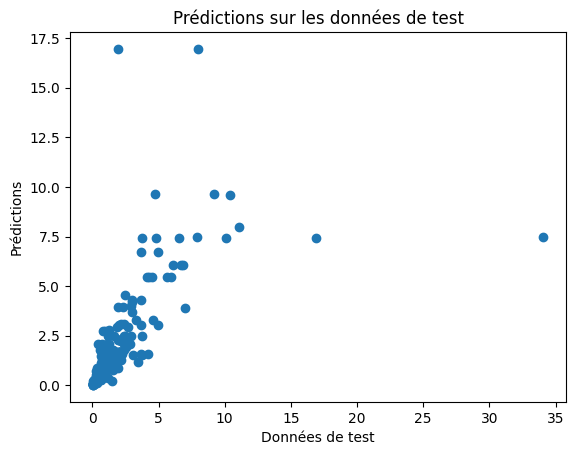

In [30]:
plt.plot(np.exp(y_test), np.exp(y_pred), 'o')
plt.xlabel('Données de test')
plt.ylabel('Prédictions')
plt.title('Prédictions sur les données de test')

# afficher le graphique
plt.show()

In [31]:
mse, rmse, r2 = performance(np.exp(y_test), np.exp(y_pred))

MSE : 4.15
RMSE: 2.04
R2 : 0.42


MSE : 5.91
RMSE: 2.43
R2 : -0.01


### 3.3.6  Bagging avec plusieurs modèles 

In [ ]:
# Create base models

model2 = LinearRegression()
model1 = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.1)

# Create an ensemble of models using bagging
bagging = BaggingRegressor(base_estimator=[model1, model2], n_estimators=10, random_state=42)

# Fit the bagging ensemble to the training data
bagging.fit(X_train_std, y_train)

# Evaluate the performance of the bagging ensemble on the test data
y_pred = bagging.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mse, rmse, r2 = performance(y_test, y_pred)